In [2]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("./data/user_ratings.csv")#.set_index("movieId")

In [11]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# find the most liked movies

In [16]:
most_liked= df.groupby("title").agg(avg_rating=("rating", "mean"),
                                    popularity = ("userId", "count"))\
                                .sort_values(by="popularity", ascending=False)

In [17]:
most_liked

,avg_rating,popularity
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
...,...,...
King Solomon's Mines (1950),3.000000,1
King Solomon's Mines (1937),2.500000,1
King Ralph (1991),1.500000,1


# Identigying Pairs

In [19]:
from itertools import permutations

In [25]:
def create_pairs(x):
    pairs = pd.DataFrame(list(permutations(x.values, 2)), 
                        columns=["movie_a", "movie_b"])
    return pairs

In [28]:
movies_pairs=df.groupby("userId").title.apply(create_pairs).reset_index(drop=True)

In [29]:
movies_pairs

,movie_a,movie_b
0,Toy Story (1995),Grumpier Old Men (1995)
1,Toy Story (1995),Heat (1995)
2,Toy Story (1995),Seven (a.k.a. Se7en) (1995)
3,Toy Story (1995),"Usual Suspects, The (1995)"
4,Toy Story (1995),From Dusk Till Dawn (1996)
...,...,...
60793295,31 (2016),Gen-X Cops (1999)
60793296,31 (2016),Bloodmoon (1997)
60793297,31 (2016),Sympathy for the Underdog (1971)
60793298,31 (2016),Hazard (2005)


In [31]:
movies_pairs.groupby(["movie_a", "movie_b"]).count()

Empty DataFrame
Columns: []
Index: [('71 (2014), (500) Days of Summer (2009)), ('71 (2014), 10 Cloverfield Lane (2016)), ('71 (2014), 127 Hours (2010)), ('71 (2014), 13 Assassins (Jûsan-nin no shikaku) (2010)), ('71 (2014), 13 Hours (2016)), ('71 (2014), 13 Sins (2014)), ('71 (2014), 1408 (2007)), ('71 (2014), 16 Blocks (2006)), ('71 (2014), 2 Fast 2 Furious (Fast and the Furious 2, The) (2003)), ('71 (2014), 2001 Maniacs (2005)), ('71 (2014), 2001: A Space Odyssey (1968)), ('71 (2014), 2012 (2009)), ('71 (2014), 22 Jump Street (2014)), ('71 (2014), 25th Hour (2002)), ('71 (2014), 28 Days Later (2002)), ('71 (2014), 28 Weeks Later (2007)), ('71 (2014), 30 Days of Night (2007)), ('71 (2014), 300 (2007)), ('71 (2014), 3000 Miles to Graceland (2001)), ('71 (2014), 31 (2016)), ('71 (2014), 3:10 to Yuma (2007)), ('71 (2014), 40-Year-Old Virgin, The (2005)), ('71 (2014), 48 Hrs. (1982)), ('71 (2014), 50 First Dates (2004)), ('71 (2014), 50/50 (2011)), ('71 (2014), 6th Day, The (2000)), ('71 (2014), 9 (2009)), ('71 (2014), A Million Ways to Die in the West (2014)), ('71 (2014), A-Team, The (2010)), ('71 (2014), A.I. Artificial Intelligence (2001)), ('71 (2014), ABCs of Death, The (2012)), ('71 (2014), AVP: Alien vs. Predator (2004)), ('71 (2014), AVPR: Aliens vs. Predator - Requiem (2007)), ('71 (2014), Abandoned, The (2006)), ('71 (2014), About Time (2013)), ('71 (2014), About a Boy (2002)), ('71 (2014), Abraham Lincoln: Vampire Hunter (2012)), ('71 (2014), Absentia (2011)), ('71 (2014), Abyss, The (1989)), ('71 (2014), Accidental Spy, The (Dak miu mai shing) (2001)), ('71 (2014), Ace Ventura: Pet Detective (1994)), ('71 (2014), Adaptation (2002)), ('71 (2014), Adjustment Bureau, The (2011)), ('71 (2014), Adventures of Baron Munchausen, The (1988)), ('71 (2014), Adventures of Tintin, The (2011)), ('71 (2014), Afflicted (2013)), ('71 (2014), After Hours (1985)), ('71 (2014), Age of Innocence, The (1993)), ('71 (2014), Airplane! (1980)), ('71 (2014), Akira (1988)), ('71 (2014), Alice Doesn't Live Here Anymore (1974)), ('71 (2014), Alien (1979)), ('71 (2014), Aliens (1986)), ('71 (2014), Almost Famous (2000)), ('71 (2014), Along Came Polly (2004)), ('71 (2014), Altered (2006)), ('71 (2014), Amazing Spider-Man, The (2012)), ('71 (2014), Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)), ('71 (2014), American Beauty (1999)), ('71 (2014), American Gangster (2007)), ('71 (2014), American Hustle (2013)), ('71 (2014), American Outlaws (2001)), ('71 (2014), American Pie 2 (2001)), ('71 (2014), American Psycho (2000)), ('71 (2014), American Splendor (2003)), ('71 (2014), American, The (2010)), ('71 (2014), Anchorman 2: The Legend Continues (2013)), ('71 (2014), Anchorman: The Legend of Ron Burgundy (2004)), ('71 (2014), And Your Mother Too (Y tu mamá también) (2001)), ('71 (2014), Anger Management (2003)), ('71 (2014), Animal House (1978)), ('71 (2014), Annie Hall (1977)), ('71 (2014), Ant-Man (2015)), ('71 (2014), Antichrist (2009)), ('71 (2014), Apartment, The (1960)), ('71 (2014), Apocalypse Now (1979)), ('71 (2014), Argo (2012)), ('71 (2014), Armour of God (Long xiong hu di) (1987)), ('71 (2014), Armour of God II: Operation Condor (Operation Condor) (Fei ying gai wak) (1991)), ('71 (2014), Army of Darkness (1993)), ('71 (2014), Around the World in 80 Days (2004)), ('71 (2014), Arrival (2016)), ('71 (2014), Art of War, The (2000)), ('71 (2014), As Above, So Below (2014)), ('71 (2014), As Good as It Gets (1997)), ('71 (2014), Assault on Precinct 13 (1976)), ('71 (2014), Assault on Precinct 13 (2005)), ('71 (2014), Audition (Ôdishon) (1999)), ('71 (2014), Austin Powers in Goldmember (2002)), ('71 (2014), Avatar (2009)), ('71 (2014), Avengers, The (2012)), ('71 (2014), Avengers: Age of Ultron (2015)), ('71 (2014), Aviator, The (2004)), ('71 (2014), Babadook, The (2014)), ('71 (2014), Back to the Future (1985)), ('71 (2014), Bad Boys II (2003)), ('71 (2014), Bad News Bears (2005)), ('71 (2014), Bad News Bears, The (1976)), ('71 (2014), Bad 

In [33]:
df1=movies_pairs.groupby(["movie_a", "movie_b"]).size().reset_index()

In [58]:
df1=df1[df1.movie_a =="(500) Days of Summer (2009)"].sort_values(by=0, ascending=False)
df1

,movie_a,movie_b,0
12350,(500) Days of Summer (2009),Forrest Gump (1994),35
15483,(500) Days of Summer (2009),Shrek (2001),33
14780,(500) Days of Summer (2009),Pirates of the Caribbean: The Curse of the Bla...,30
16502,(500) Days of Summer (2009),Up (2009),30
11647,(500) Days of Summer (2009),"Dark Knight, The (2008)",30
...,...,...,...
13240,(500) Days of Summer (2009),Into the Woods (1991),1
13243,(500) Days of Summer (2009),Intolerance: Love's Struggle Throughout the Ag...,1
13247,(500) Days of Summer (2009),Inventing the Abbotts (1997),1
13249,(500) Days of Summer (2009),Investigation Held by Kolobki (1986),1


<Axes: xlabel='movie_b'>

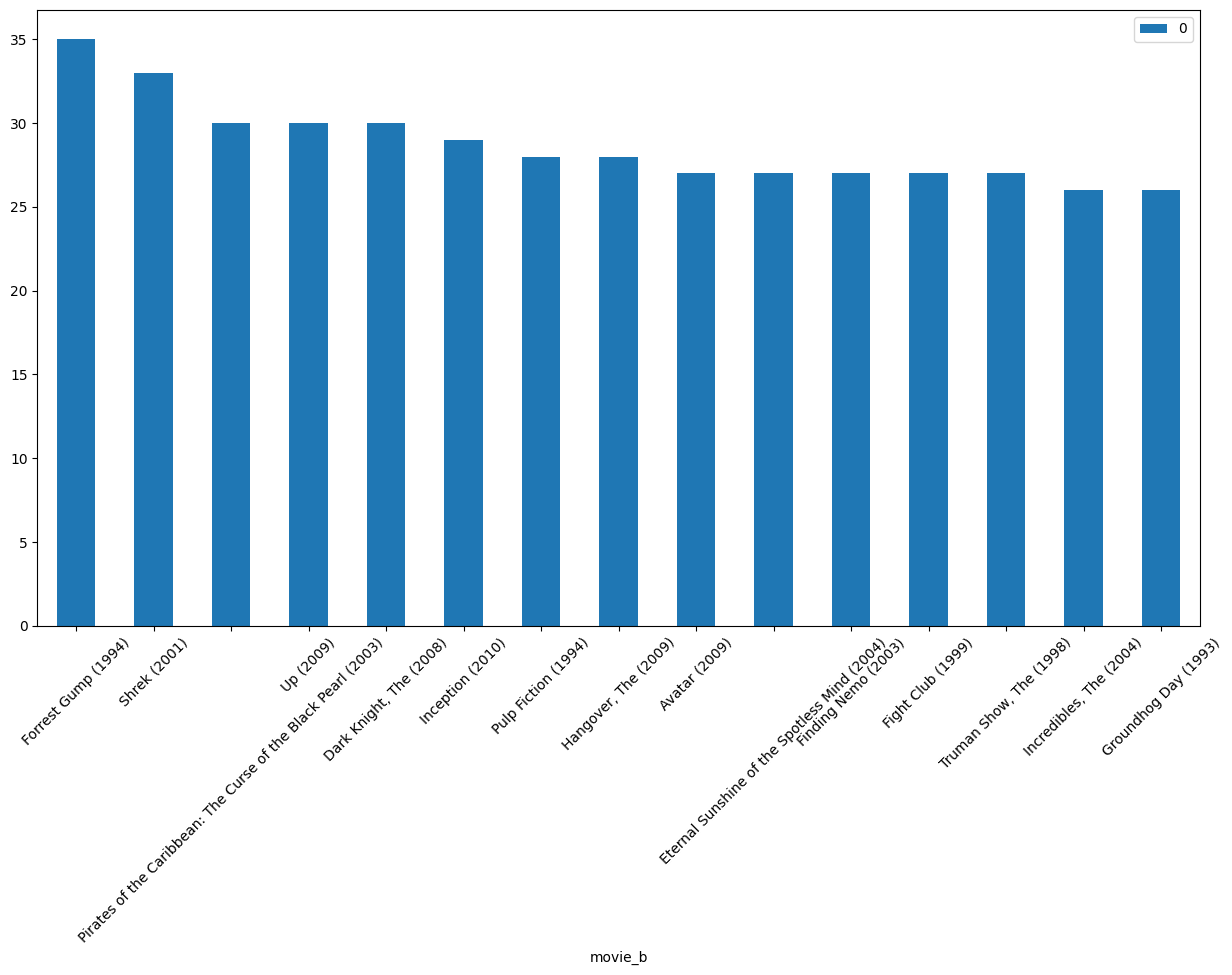

In [59]:
df1.head(15).plot.bar(x="movie_b", rot=45, figsize=(15, 8))

# The same excercise but filtering with liked movies

In [43]:
movies_pairs2=df[df.rating>=4].groupby("userId").title.apply(create_pairs).reset_index(drop=True)

In [44]:
movies_pairs2

,movie_a,movie_b
0,Toy Story (1995),Grumpier Old Men (1995)
1,Toy Story (1995),Heat (1995)
2,Toy Story (1995),Seven (a.k.a. Se7en) (1995)
3,Toy Story (1995),"Usual Suspects, The (1995)"
4,Toy Story (1995),Bottle Rocket (1996)
...,...,...
11098847,Sympathy for the Underdog (1971),The Witch (2015)
11098848,Sympathy for the Underdog (1971),Invincible Shaolin (1978)
11098849,Sympathy for the Underdog (1971),Last Shift (2014)
11098850,Sympathy for the Underdog (1971),The Boy and the Beast (2015)


In [45]:
movies_pairs2.groupby(["movie_a", "movie_b"]).count()

Empty DataFrame
Columns: []
Index: [('71 (2014), 10 Cloverfield Lane (2016)), ('71 (2014), 127 Hours (2010)), ('71 (2014), 13 Assassins (Jûsan-nin no shikaku) (2010)), ('71 (2014), 1408 (2007)), ('71 (2014), 2001: A Space Odyssey (1968)), ('71 (2014), 22 Jump Street (2014)), ('71 (2014), 25th Hour (2002)), ('71 (2014), 28 Days Later (2002)), ('71 (2014), 28 Weeks Later (2007)), ('71 (2014), 300 (2007)), ('71 (2014), 40-Year-Old Virgin, The (2005)), ('71 (2014), 48 Hrs. (1982)), ('71 (2014), 50/50 (2011)), ('71 (2014), About Time (2013)), ('71 (2014), Abyss, The (1989)), ('71 (2014), Adaptation (2002)), ('71 (2014), Adventures of Baron Munchausen, The (1988)), ('71 (2014), After Hours (1985)), ('71 (2014), Akira (1988)), ('71 (2014), Alice Doesn't Live Here Anymore (1974)), ('71 (2014), Alien (1979)), ('71 (2014), Aliens (1986)), ('71 (2014), Almost Famous (2000)), ('71 (2014), Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)), ('71 (2014), American Hustle (2013)), ('71 (2014), American Psycho (2000)), ('71 (2014), American Splendor (2003)), ('71 (2014), Anchorman: The Legend of Ron Burgundy (2004)), ('71 (2014), And Your Mother Too (Y tu mamá también) (2001)), ('71 (2014), Apartment, The (1960)), ('71 (2014), Apocalypse Now (1979)), ('71 (2014), Argo (2012)), ('71 (2014), Armour of God (Long xiong hu di) (1987)), ('71 (2014), Armour of God II: Operation Condor (Operation Condor) (Fei ying gai wak) (1991)), ('71 (2014), Army of Darkness (1993)), ('71 (2014), Arrival (2016)), ('71 (2014), As Good as It Gets (1997)), ('71 (2014), Assault on Precinct 13 (1976)), ('71 (2014), Audition (Ôdishon) (1999)), ('71 (2014), Avatar (2009)), ('71 (2014), Avengers, The (2012)), ('71 (2014), Avengers: Age of Ultron (2015)), ('71 (2014), Aviator, The (2004)), ('71 (2014), Babadook, The (2014)), ('71 (2014), Back to the Future (1985)), ('71 (2014), Bad News Bears, The (1976)), ('71 (2014), Bad Santa (2003)), ('71 (2014), Bad Taste (1987)), ('71 (2014), Barton Fink (1991)), ('71 (2014), Batman (1989)), ('71 (2014), Batman Begins (2005)), ('71 (2014), Battle Royale (Batoru rowaiaru) (2000)), ('71 (2014), Before Sunrise (1995)), ('71 (2014), Behind the Mask: The Rise of Leslie Vernon (2006)), ('71 (2014), Bernie (2011)), ('71 (2014), Best in Show (2000)), ('71 (2014), Better Tomorrow II, A (Ying hung boon sik II) (1987)), ('71 (2014), Better Tomorrow, A (Ying hung boon sik) (1986)), ('71 (2014), Big Fish (2003)), ('71 (2014), Big Hero 6 (2014)), ('71 (2014), Big Lebowski, The (1998)), ('71 (2014), Big Short, The (2015)), ('71 (2014), Big Trouble in Little China (1986)), ('71 (2014), Billy Elliot (2000)), ('71 (2014), Bird People in China, The (Chûgoku no chôjin) (1998)), ('71 (2014), Birdman: Or (The Unexpected Virtue of Ignorance) (2014)), ('71 (2014), Bittersweet Life, A (Dalkomhan insaeng) (2005)), ('71 (2014), Black Hawk Down (2001)), ('71 (2014), Blade II (2002)), ('71 (2014), Blade Runner (1982)), ('71 (2014), Blazing Saddles (1974)), ('71 (2014), Blood: The Last Vampire (2000)), ('71 (2014), Blue Valentine (2010)), ('71 (2014), Blue Velvet (1986)), ('71 (2014), Boiler Room (2000)), ('71 (2014), Bone Tomahawk (2015)), ('71 (2014), Bonnie and Clyde (1967)), ('71 (2014), Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan (2006)), ('71 (2014), Bourne Identity, The (2002)), ('71 (2014), Bourne Supremacy, The (2004)), ('71 (2014), Bourne Ultimatum, The (2007)), ('71 (2014), Bowling for Columbine (2002)), ('71 (2014), Boyhood (2014)), ('71 (2014), Branded to Kill (Koroshi no rakuin) (1967)), ('71 (2014), Braveheart (1995)), ('71 (2014), Brazil (1985)), ('71 (2014), Breakfast Club, The (1985)), ('71 (2014), Brick (2005)), ('71 (2014), Bridesmaids (2011)), ('71 (2014), Bridge of Spies (2015)), ('71 (2014), Bringing Out the Dead (1999)), ('71 (2014), Broken Flowers (2005)), ('71 (2014), Brotherhood of the Wolf (Pacte des loups, Le) (2001)), ('71 (2014), Brothers Bloom, The (2008)), ('71 (2014), Bubba Ho-tep (2002))

In [46]:
df2=movies_pairs2.groupby(["movie_a", "movie_b"]).size().reset_index()

In [48]:
df2 = df2[df2.movie_a =="(500) Days of Summer (2009)"].sort_values(by=0, ascending=False)

In [49]:
df2

,movie_a,movie_b,0
1925,(500) Days of Summer (2009),"Dark Knight, The (2008)",17
2170,(500) Days of Summer (2009),Forrest Gump (1994),16
2082,(500) Days of Summer (2009),Eternal Sunshine of the Spotless Mind (2004),15
2497,(500) Days of Summer (2009),Inception (2010),15
3378,(500) Days of Summer (2009),"Shawshank Redemption, The (1994)",14
...,...,...,...
2475,(500) Days of Summer (2009),"Illusionist, The (L'illusionniste) (2010)",1
2473,(500) Days of Summer (2009),Ikiru (1952),1
2472,(500) Days of Summer (2009),Igby Goes Down (2002),1
2471,(500) Days of Summer (2009),"Idiots, The (Idioterne) (1998)",1


<Axes: xlabel='movie_b'>

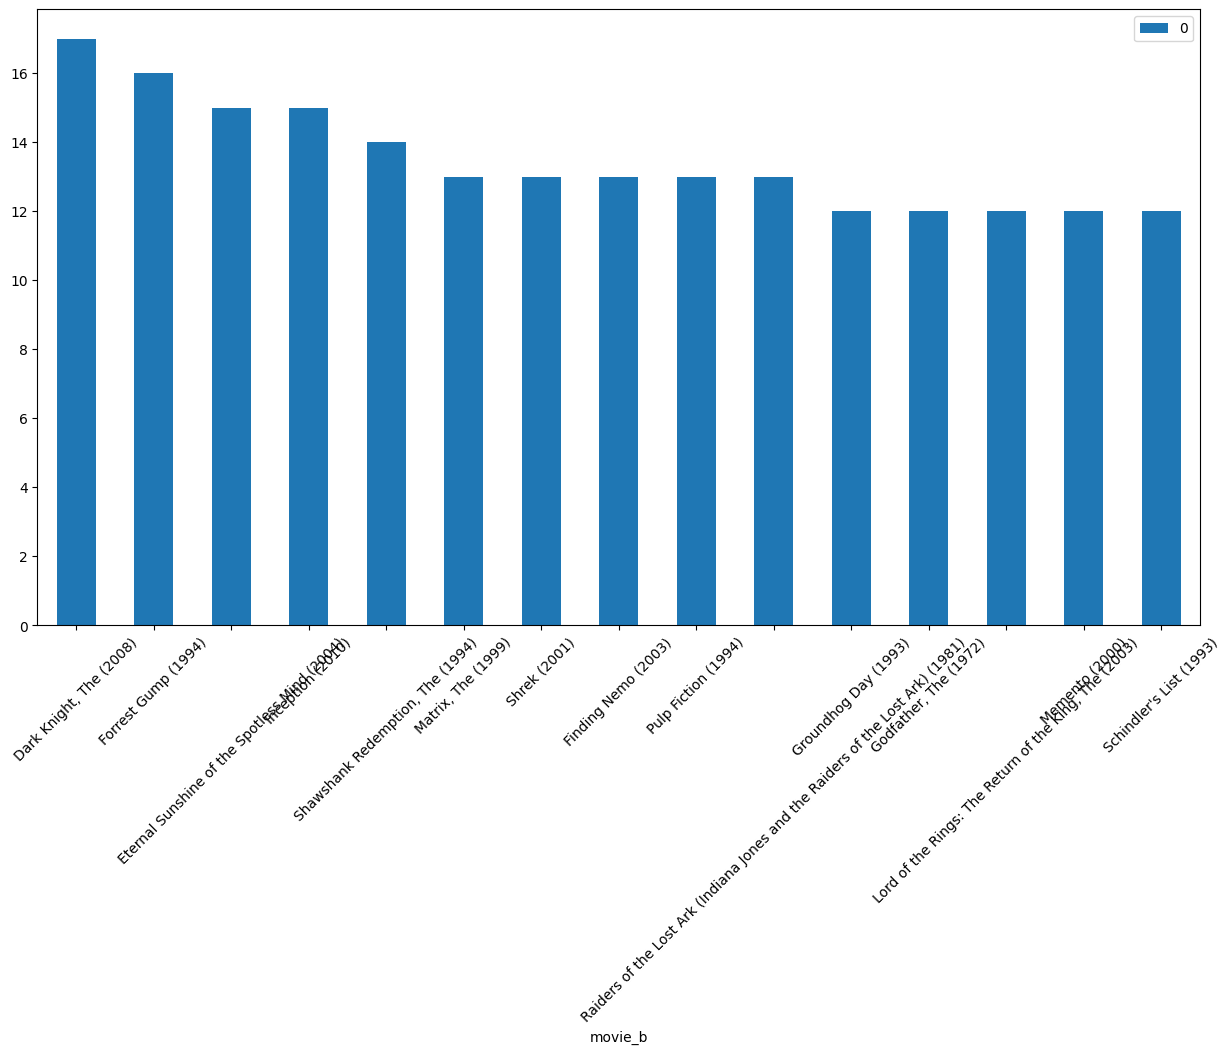

In [57]:
df2.head(15).plot.bar(x="movie_b", rot=45, figsize=(15, 8))